<a href="https://colab.research.google.com/github/RuslanMavlitov/IDE/blob/master/project_TSA_Mavlitov_ruslan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## !["Проанализаруем ВВП Ганы"](https://cdn.vox-cdn.com/thumbor/ajxB-x_n-_J-5WQcBug6LS2zMFo=/0x0:4787x2693/1600x900/cdn.vox-cdn.com/uploads/chorus_image/image/51188781/GettyImages-450994248.0.jpg)

In [1]:
import pandas as pd
data = pd.read_csv('/content/sample_data/ghana_gdp.zip', parse_dates=["year"], index_col = ["year"])
data = data.rename({'GDP (current US$)':'GDP'}, axis= 1)
display(data.head())
data.tail()

,GDP
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


,GDP
year,
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10
2019-01-01,6.833754e+10
2020-01-01,7.004320e+10
2021-01-01,7.759428e+10


In [ ]:
data.describe()

,GDP
count,6.200000e+01
mean,1.580793e+10
std,2.171517e+10
min,0.000000e+00
25%,2.831182e+09
50%,5.379735e+09
75%,1.801684e+10
max,7.759428e+10


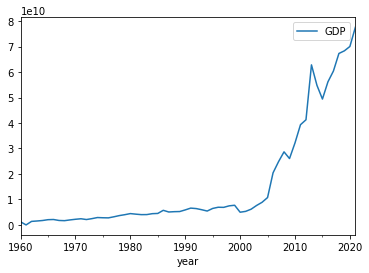

In [2]:
%matplotlib inline 
data.plot();

In [3]:
train_df = data.loc[:"2019-01-01"]
test_df = data.loc["2019-01-01":]
train_df.shape, test_df.shape

((60, 1), (3, 1))

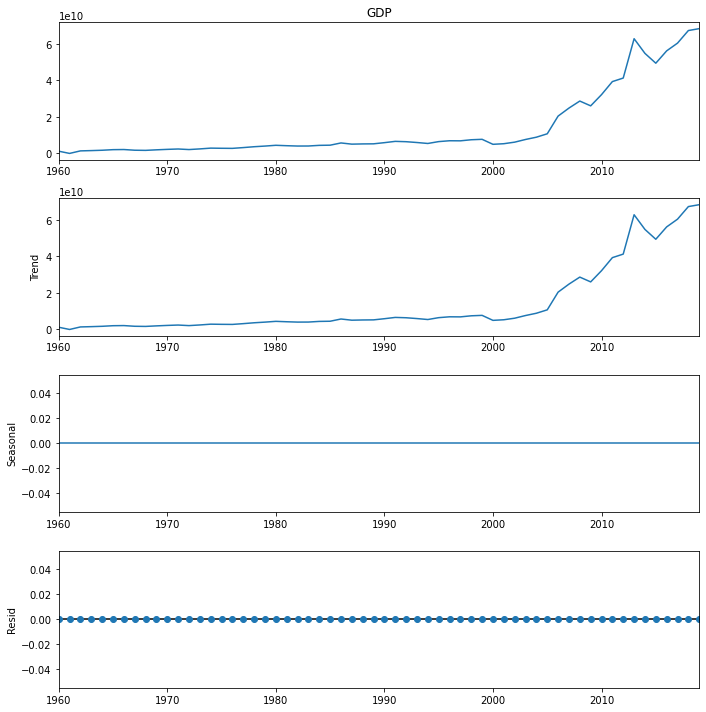

In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = 10, 10

result = seasonal_decompose(train_df.GDP, model='additive')
result.plot()
plt.show()

При разложении отчетливо выделился тренд, без сезонности (так как взяты годовые промежутки) и без шума

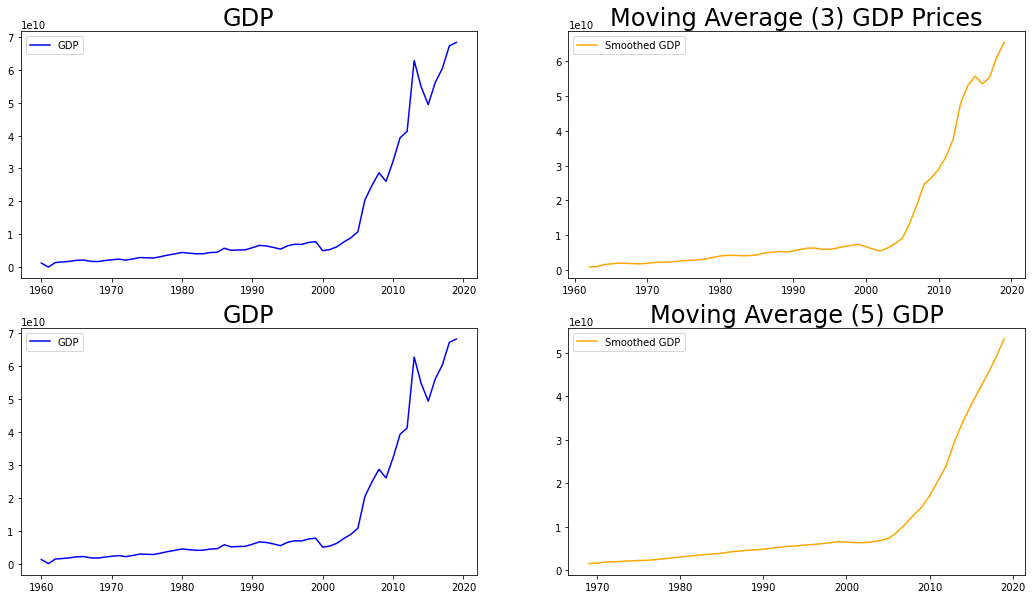

In [ ]:
plt.rcParams["figure.figsize"] = 18, 10

fig, ax = plt.subplots(2, 2)

# Окно в год (Window = 3) 
ax[0, 0].plot(train_df.GDP, color = "blue", label = "GDP")
ax[0, 0].set_title("GDP", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(train_df.GDP.rolling(window=3).mean(), color = "orange", label = "Smoothed GDP")
ax[0, 1].set_title("Moving Average (3) GDP Prices", size = 24)
ax[0, 1].legend()


# Окно в год (Window = 5)
ax[1, 0].plot(train_df.GDP, color = "blue", label = "GDP")
ax[1, 0].set_title("GDP", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(train_df.GDP.rolling(window=10).mean(), color = "orange", label = "Smoothed GDP")
ax[1, 1].set_title("Moving Average (5) GDP", size = 24)
ax[1, 1].legend()

Сглаживание с шагом в 5 лет уже дает ровную линию изменения ВВП.

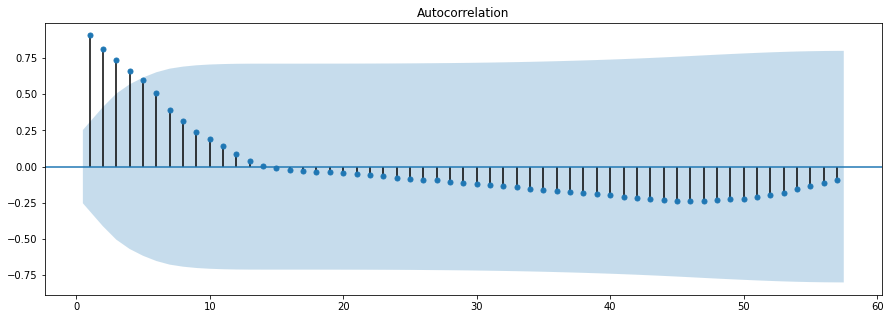

In [7]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 15, 5
sgt.plot_acf(train_df.GDP, zero = False, lags = 57)
plt.show()

цены ВВП сильно коррелированы с последними годами. Корреляция сильно снижается и уходит в отрицательную величину с учетом более старых значений.





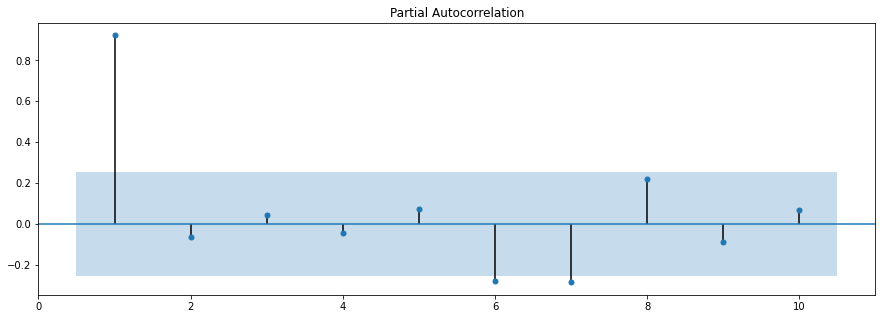

In [8]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 15, 5
sgt.plot_pacf(train_df.GDP, zero = False, lags = 10)
plt.show()

Тут понятно только то, что параметр p выбирается =1. 


In [9]:
from statsmodels.tsa.stattools import adfuller

adfuller(train_df["GDP"])

(0.5782902144237627,
 0.9870681153049116,
 10,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 2239.7989988859235)

In [10]:
test1 = adfuller(train_df["GDP"])
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')


adf:  0.5782902144237627
p-value:  0.9870681153049116
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


Статистика теста больше всех критических значений, поэтому нулевую гипотезу ($H_0$) нельзя отвергнуть.

Поэтому GDP не являются стационарными, следовательно дифференциреум!!!

In [ ]:
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)
    
    sgt.plot_acf(series, lags = 5, ax = axes[0])
    sgt.plot_pacf(series, lags = 5, ax = axes[1])
    plt.show()

## Дифференцирование ряда
$y\_new_t = y_t - y_{t-1}$

where, 
- $y\_new_t$: Дифференцированное значение ряда $t$
- $y_t$: Фактическое значение ряда $t$
- $y_{t-1}$: Фактическое значение ряда $t-1$

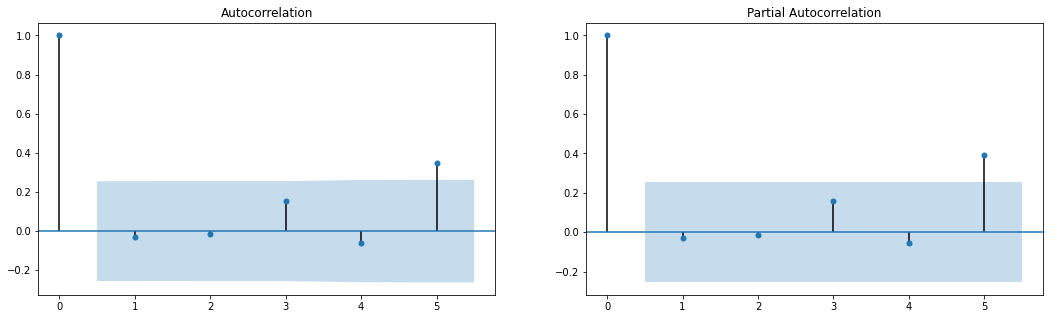

(-1.5585831471388767,
 0.5043580595671038,
 9,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 2192.9443764954754)

In [ ]:
plot_acf_pacf(train_df["GDP"].diff(1).dropna())
adfuller(train_df["GDP"].diff(1).dropna())

Первые разности не являются стационарными, дифференцируем еще!!

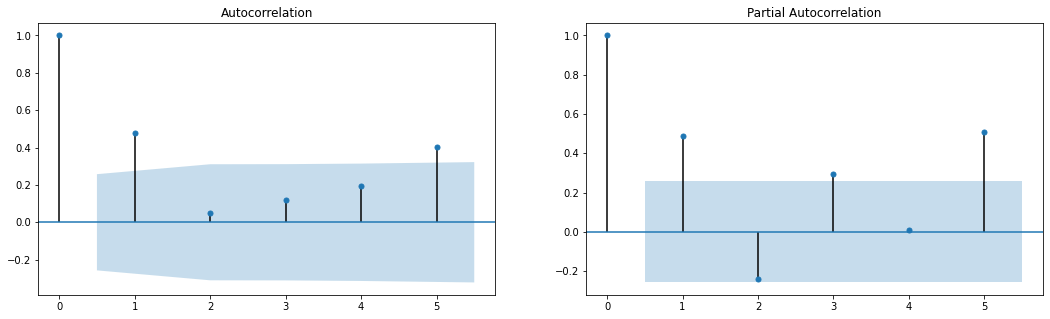

(-2.548632308727691,
 0.10408533220774874,
 11,
 46,
 {'1%': -3.5812576580093696,
  '5%': -2.9267849124681518,
  '10%': -2.6015409829867675},
 2153.408865167525)

In [ ]:
plot_acf_pacf(train_df["GDP"].diff(2).dropna())
adfuller(train_df["GDP"].diff(2).dropna())

Минимальный уровень значимости по тесту adfuller равен 0.10


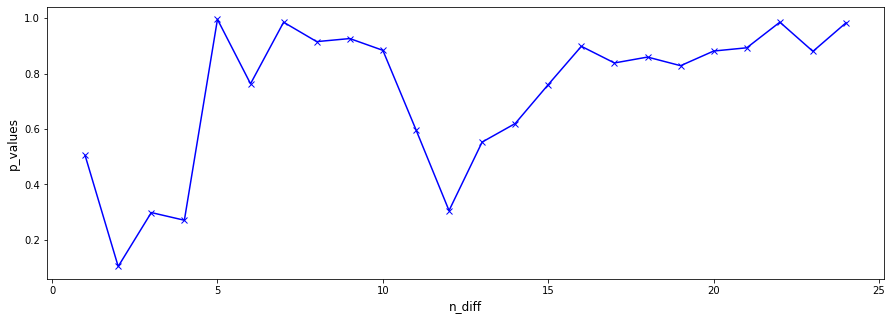

In [20]:
p_values = []
for i in range(1, 25):
  test1 = adfuller(train_df["GDP"].diff(i).dropna())
  p_values.append(test1[1])

print(f'Минимальный уровень значимости по тесту adfuller равен {min(p_values):.2f}')
plt.xlabel("n_diff", fontsize=12)
plt.ylabel("p_values", fontsize=12)
plt.plot([i for i in range(1, 25)], p_values, 'xb-');

Не достигается стационраность временного ряда даже при 25 дифференцированиях. Остановимся на одном (d=1)

## ARIMA, SARIMA

Начнем построение модели **ARIMA** со следующими параметрами:

- p = 1 
- d = 1 
- q = 1 

Если рассматривать сезонную модель (**SARMA**), то в модель можно добавить следующие параметры.

- m = 0 (тут у нас ежегодные данные, поэтому сеззоности точно не будет)
- P = 1 
- D = 1
- Q = 1 

In [21]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_df["GDP"].dropna(), order = (1, 1, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1385.001
Date:                Sat, 05 Nov 2022   AIC                           2776.003
Time:                        10:28:40   BIC                           2782.235
Sample:                    01-01-1960   HQIC                          2778.436
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9788      0.149      6.581      0.000       0.687       1.270
ma.L1         -0.8944      0.210     -4.261      0.000      -1.306      -0.483
sigma2      1.598e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   1.75   Jarque-Bera (JB):               368.62
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):             166.44   Skew:                             1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.89e+54. Standard errors may be unstable.
"""

Второй столбец раздела I содержит некоторые полезные показатели, которые используются для сравнения различных моделей ARIMA. Как правило, модель с более высоким логарифмическим правдоподобием или более низким IC (AIC, BIC или HQIC) лучше, и наоборот.

In [24]:
seas_model = SARIMAX(train_df["GDP"].dropna(), order = (1, 1, 1), seasonal_order = (1, 1, 2, 5))
seas_model_fit = seas_model.fit()
seas_model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                    GDP   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 5)   Log Likelihood               -1267.452
Date:                                Sat, 05 Nov 2022   AIC                           2546.903
Time:                                        10:30:47   BIC                           2558.837
Sample:                                    01-01-1960   HQIC                          2551.506
                                         - 01-01-2019                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1420      1.058      0.134      0.893      -1.932       2.216
ma.L1         -0.2538      1.048     -0.242      0.809      -2.307       1.800
ar.S.L5       -0.6805      5.003     -0.136      0.892     -10.487       9.126
ma.S.L5        0.1811      4.912      0.037      0.971      -9.446       9.808
ma.S.L10      -0.4546      2.422     -0.188      0.851      -5.202       4.293
sigma2      1.864e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               392.43
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):             223.22   Skew:                             2.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+52. Standard errors may be unstable.
"""

In [25]:
pred_df = pd.DataFrame(index = data.index)
pred_df["model_preds"] = seas_model_fit.predict(start = test_df.index[1], end = test_df.index[-1])


pred_df["GDP"] = data["GDP"]

forecast = seas_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha = 0.05) # Confidence level of 95%

pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower GDP"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper GDP"]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


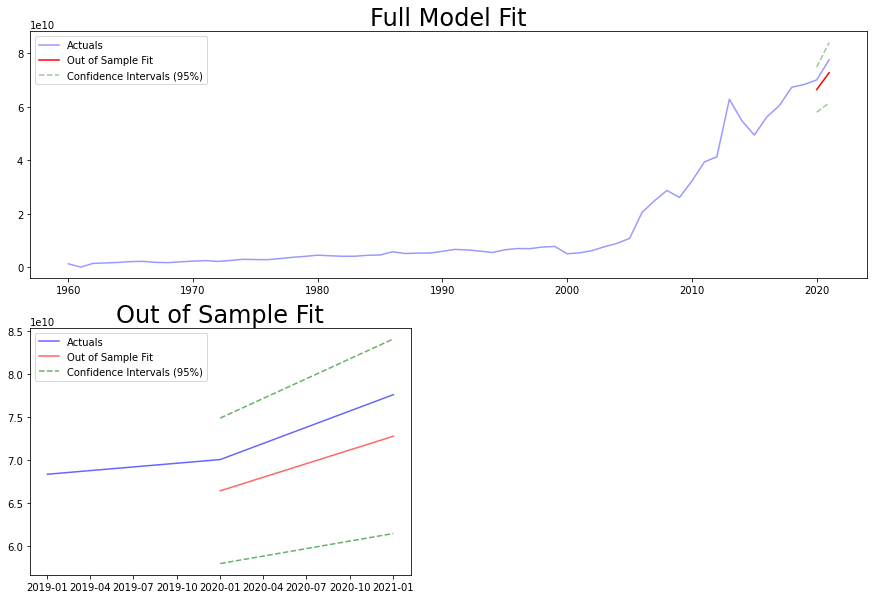

In [26]:
plt.rcParams["figure.figsize"] = 15, 10

plt.subplot(2, 1, 1)
plt.plot(pred_df["GDP"], color = "blue", label = "Actuals", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit")
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.4)
plt.title("Full Model Fit", size = 24)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(pred_df.loc[test_df.index]["GDP"], color = "blue", label = "Actuals", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.6)
plt.title("Out of Sample Fit", size = 24)
plt.legend()

plt.show()

In [35]:
!pip install pmdarima
#!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
# pip install pmdarima
import pmdarima as pm

smodel = pm.auto_arima(train_df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=5,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

ImportError: ignored